<a href="https://colab.research.google.com/github/booka43/MLbpi2025/blob/main/%D0%9F%D1%80%D0%B0%D0%BA%D1%82%D0%B8%D0%BA%D0%B0_2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# МЛ Практика 2: Статистика в действии и её влияние на модель

## **Цель занятия:**
Изучить, как статистические метрики (среднее, медиана, квантили, размер выборки, стандартное отклонение) влияют на анализ данных и построение моделей машинного обучения. На практике мы проведем анализ целевой переменной **Y**, обучим модель линейной регрессии и исследуем влияние статистических характеристик на метрики модели.

## **Задание состоит из следующих частей:**
1. Анализ целевой переменной **Y** с точки зрения статистики. (в нашем случае - бинарная классификация)
2. Анализ пропусков
2. Изучение влияния статистических метрик на данные.
3. Обучение модели линейной регрессии и оценка ее точности.
4. Проведение теста Пирсона.
5. Визуализация результатов и анализ влияния статистики на метрики модели.
6. Валидация модели
---

## 1. Анализ целевой переменной Y с точки зрения статистики

### **Описание:**
В этом разделе вы проведете статистический анализ целевой переменной **Y**, изучите ее распределение и основные статистические характеристики.

1. **Импортируйте необходимые библиотеки:**

In [ ]:
!pip install pandas scikit-learn seaborn scipy

In [ ]:
   import pandas as pd
   import numpy as np
   import matplotlib.pyplot as plt
   import seaborn as sns
   from scipy import stats

2. **Загружаем набор данных:**

In [ ]:
# Загрузка набора данных
df = pd.read_csv('/content/heart.csv')

In [ ]:
df

,AGE_50,MD_50,SBP_50,DBP_50,HT_50,WT_50,CHOL_50,SES,CL_STATUS,MD_62,SBP_62,DBP_62,CHOL_62,WT_62,IHD_DX,DEATH
0,42,1,110,65,64,147,291,2,8,4,120,78,271,146,2,1
1,53,1,130,72,69,167,278,1,6,2,122,68,250,165,9,1
2,53,2,120,90,70,222,342,4,8,1,132,90,304,223,2,1
3,48,4,120,80,72,229,239,4,8,2,118,68,209,227,3,1
4,53,3,118,74,66,134,243,3,8,5,118,56,261,138,2,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
195,50,1,115,80,66,148,300,2,8,1,115,65,273,152,0,0
196,23,1,110,70,69,137,120,3,8,2,112,76,198,153,0,0
197,20,3,130,80,66,150,210,5,0,1,130,85,274,158,0,0
198,46,3,140,84,66,138,130,4,6,2,148,88,160,157,0,0


In [ ]:
# для удобства распечатаем все колонки
for column in df.columns:
  print(f'колонка: {column}')

колонка: AGE_50
колонка: MD_50
колонка: SBP_50
колонка: DBP_50
колонка: HT_50
колонка: WT_50
колонка: CHOL_50
колонка: SES
колонка: CL_STATUS
колонка: MD_62
колонка: SBP_62
колонка: DBP_62
колонка: CHOL_62
колонка: WT_62
колонка: IHD_DX
колонка: DEATH


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200 entries, 0 to 199
Data columns (total 16 columns):
 #   Column     Non-Null Count  Dtype
---  ------     --------------  -----
 0   AGE_50     200 non-null    int64
 1   MD_50      200 non-null    int64
 2   SBP_50     200 non-null    int64
 3   DBP_50     200 non-null    int64
 4   HT_50      200 non-null    int64
 5   WT_50      200 non-null    int64
 6   CHOL_50    200 non-null    int64
 7   SES        200 non-null    int64
 8   CL_STATUS  200 non-null    int64
 9   MD_62      200 non-null    int64
 10  SBP_62     200 non-null    int64
 11  DBP_62     200 non-null    int64
 12  CHOL_62    200 non-null    int64
 13  WT_62      200 non-null    int64
 14  IHD_DX     200 non-null    int64
 15  DEATH      200 non-null    int64
dtypes: int64(16)
memory usage: 25.1 KB


3. **Проверьте наличие пропущенных значений и работа с пропусками для числовых:**

In [ ]:
# Проверка на пропущенные значения
print(df.isnull().sum()) # пропусков нет

AGE_50       0
MD_50        0
SBP_50       0
DBP_50       0
HT_50        0
WT_50        0
CHOL_50      0
SES          0
CL_STATUS    0
MD_62        0
SBP_62       0
DBP_62       0
CHOL_62      0
WT_62        0
IHD_DX       0
DEATH        0
dtype: int64


In [ ]:
# генерируем случайную последовательность
np.random.seed(42)
df_test_nan = df.copy()
df_test_nan.loc[np.random.choice(df_test_nan.index, size=5, replace=True), 'SES'] = np.nan

In [ ]:
# Проверка на пропущенные значения
print(df_test_nan.isnull().sum()) # пропусков нет

AGE_50       0
MD_50        0
SBP_50       0
DBP_50       0
HT_50        0
WT_50        0
CHOL_50      0
SES          5
CL_STATUS    0
MD_62        0
SBP_62       0
DBP_62       0
CHOL_62      0
WT_62        0
IHD_DX       0
DEATH        0
dtype: int64


In [ ]:
# Вариант 1: Удаление строк с пропусками
df_drop = df_test_nan.dropna()
print("\n# Удаление строк с пропусками")
print(df.isnull().sum()) # пропусков нет


# Удаление строк с пропусками
AGE_50       0
MD_50        0
SBP_50       0
DBP_50       0
HT_50        0
WT_50        0
CHOL_50      0
SES          0
CL_STATUS    0
MD_62        0
SBP_62       0
DBP_62       0
CHOL_62      0
WT_62        0
IHD_DX       0
DEATH        0
dtype: int64


In [ ]:
# Вариант 2: Заполнение пропусков медианой
df_median = df_test_nan.copy()
df_median.SES = df_median.SES.fillna(df_median.SES.median())

print("\n# Заполнение пропусков медианой")
print(df_median.isnull().sum()) # пропусков нет


# Заполнение пропусков медианой
AGE_50       0
MD_50        0
SBP_50       0
DBP_50       0
HT_50        0
WT_50        0
CHOL_50      0
SES          0
CL_STATUS    0
MD_62        0
SBP_62       0
DBP_62       0
CHOL_62      0
WT_62        0
IHD_DX       0
DEATH        0
dtype: int64


In [ ]:
# Вариант 3: Заполнение пропусков средним
df_mean = df_test_nan.copy()
df_mean.SES = df_mean.SES.fillna(df_median.SES.mean())

print("\n# Заполнение пропусков средним")
print(df_mean.isnull().sum()) # пропусков нет


# Заполнение пропусков средним
AGE_50       0
MD_50        0
SBP_50       0
DBP_50       0
HT_50        0
WT_50        0
CHOL_50      0
SES          0
CL_STATUS    0
MD_62        0
SBP_62       0
DBP_62       0
CHOL_62      0
WT_62        0
IHD_DX       0
DEATH        0
dtype: int64


Заполнение категориальных признаков не происходит потому что данные все int 64



Как вариант - можно использовать KNN (K-ближайших соедей)

4. **Выбираем целвую переменную**

В качестве целевой выбираем категориальную переменную, либо превращаем числовую в категориальное


В датасете  heart была выбрана категорияальная целевая переменная DEATH, которая имеет состояние 1 - "жив", 0 - "не жив"

In [ ]:
df['death_chance'] = df['DEATH']

In [ ]:
class_distribution = pd.Series(df['death_chance']).value_counts()
print(class_distribution)

death_chance
0    136
1     64
Name: count, dtype: int64


In [ ]:
df.columns

Index(['AGE_50', 'MD_50', 'SBP_50', 'DBP_50', 'HT_50', 'WT_50', 'CHOL_50',
       'SES', 'CL_STATUS', 'MD_62', 'SBP_62', 'DBP_62', 'CHOL_62', 'WT_62',
       'IHD_DX', 'DEATH', 'death_chance'],
      dtype='object')

In [ ]:
Y = df['death_chance'] # выбираем целевую переменную (категориальную)
X = df.drop(['death_chance', 'DEATH'], axis=1) # переменные для проверки влияния

# В моем случае я дропаю базовую переменную, а не только. Y


5. **Графический анализ**

In [ ]:
# Список числовых колонок для построения графиков
numeric_cols = X.select_dtypes(include=['float64', 'int64'])
numeric_cols

,AGE_50,MD_50,SBP_50,DBP_50,HT_50,WT_50,CHOL_50,SES,CL_STATUS,MD_62,SBP_62,DBP_62,CHOL_62,WT_62,IHD_DX
0,42,1,110,65,64,147,291,2,8,4,120,78,271,146,2
1,53,1,130,72,69,167,278,1,6,2,122,68,250,165,9
2,53,2,120,90,70,222,342,4,8,1,132,90,304,223,2
3,48,4,120,80,72,229,239,4,8,2,118,68,209,227,3
4,53,3,118,74,66,134,243,3,8,5,118,56,261,138,2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
195,50,1,115,80,66,148,300,2,8,1,115,65,273,152,0
196,23,1,110,70,69,137,120,3,8,2,112,76,198,153,0
197,20,3,130,80,66,150,210,5,0,1,130,85,274,158,0
198,46,3,140,84,66,138,130,4,6,2,148,88,160,157,0


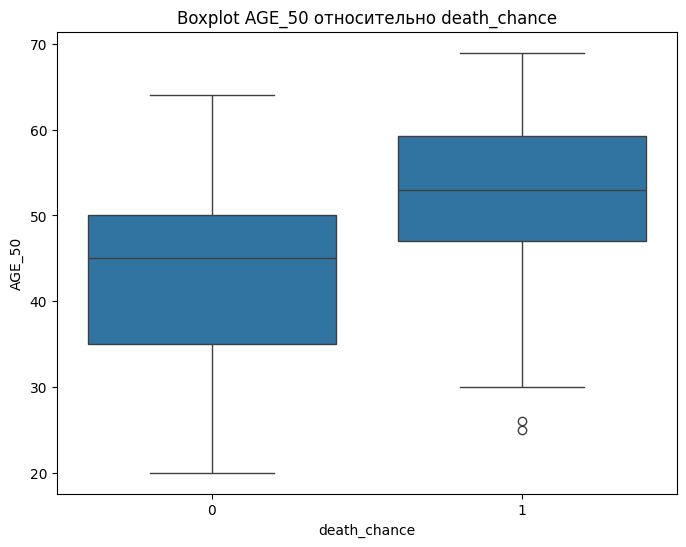

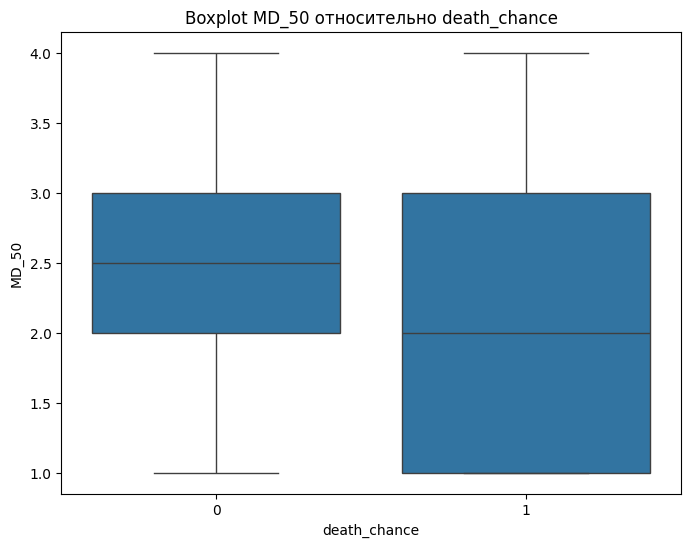

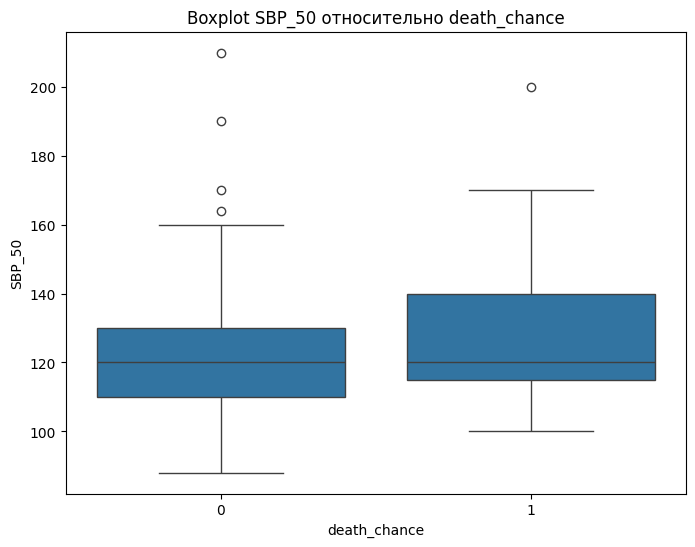

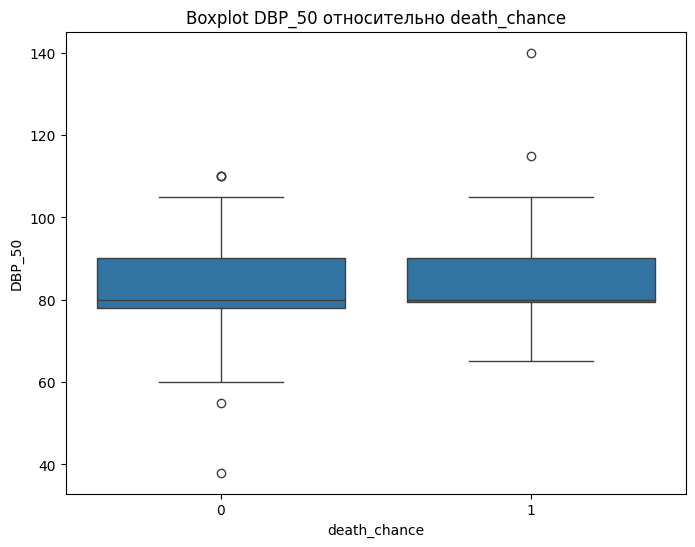

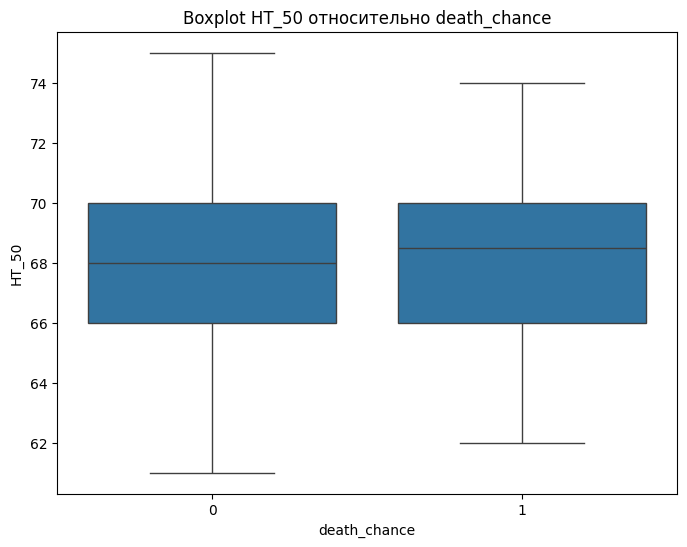

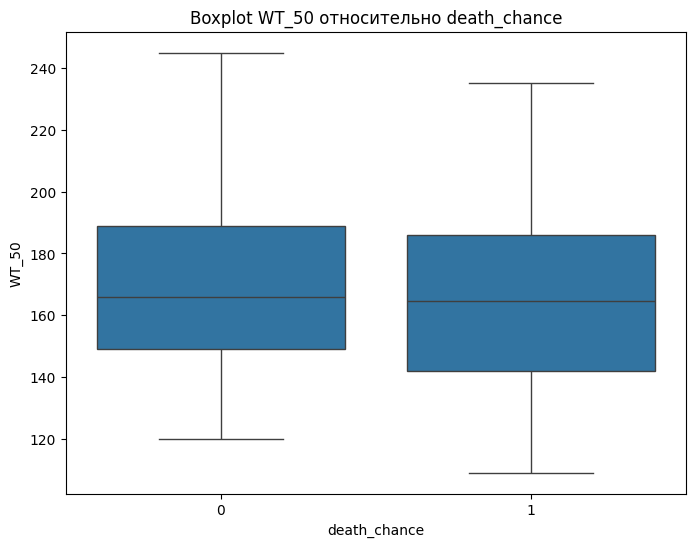

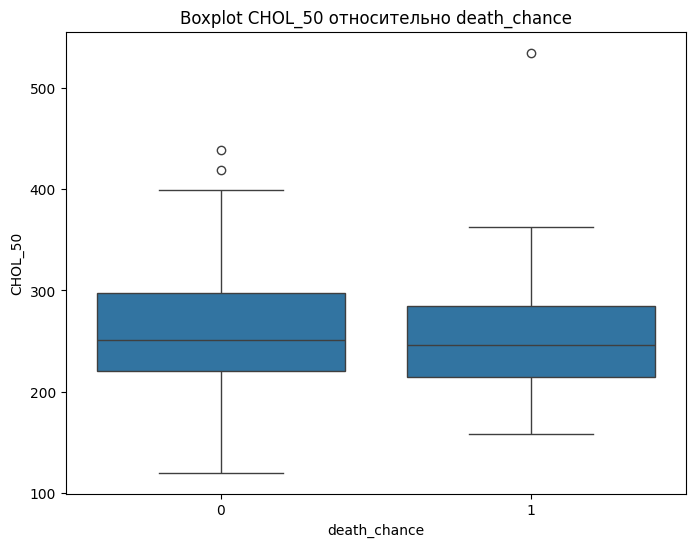

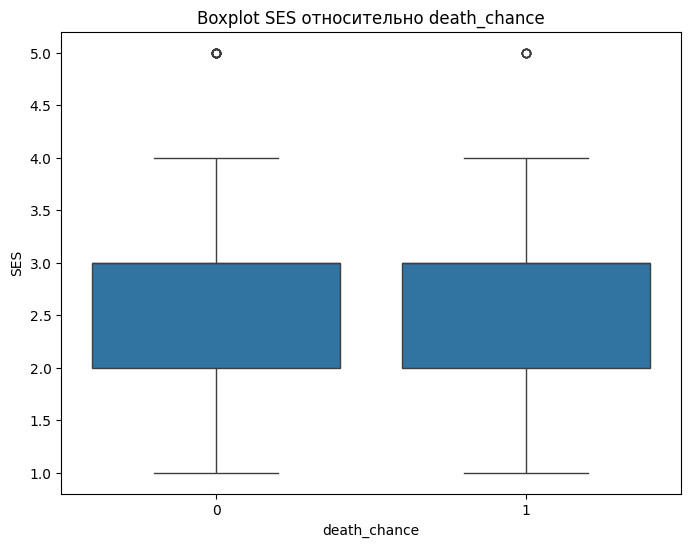

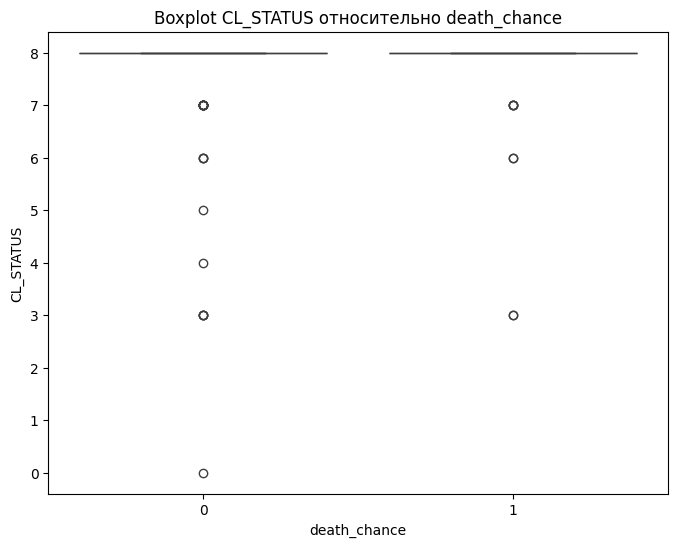

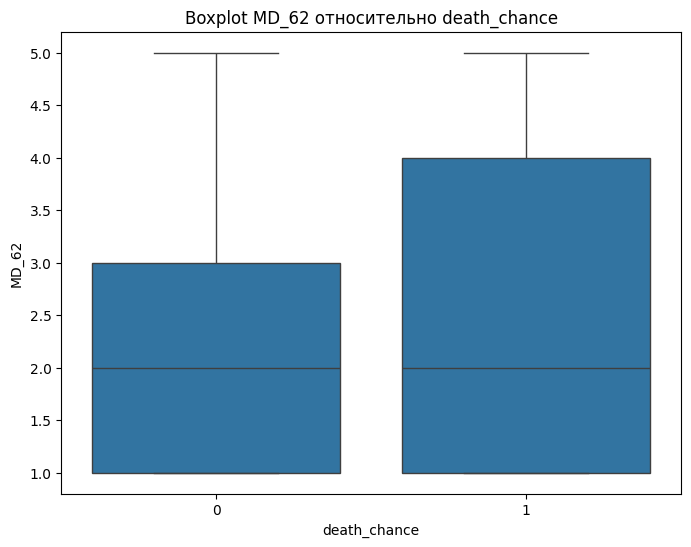

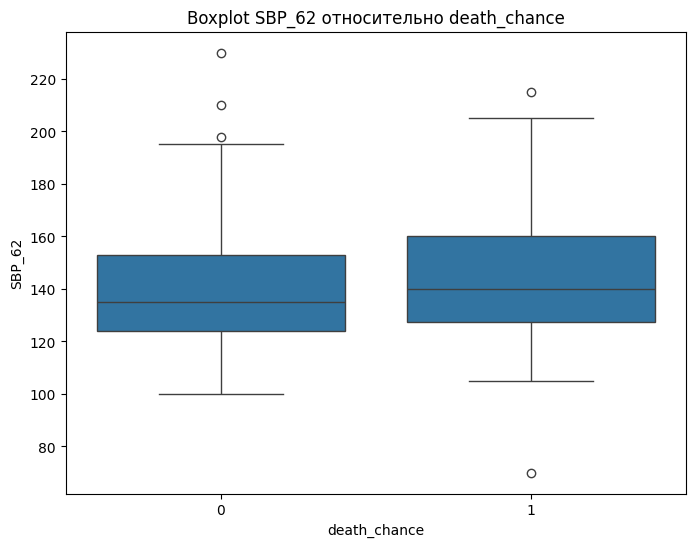

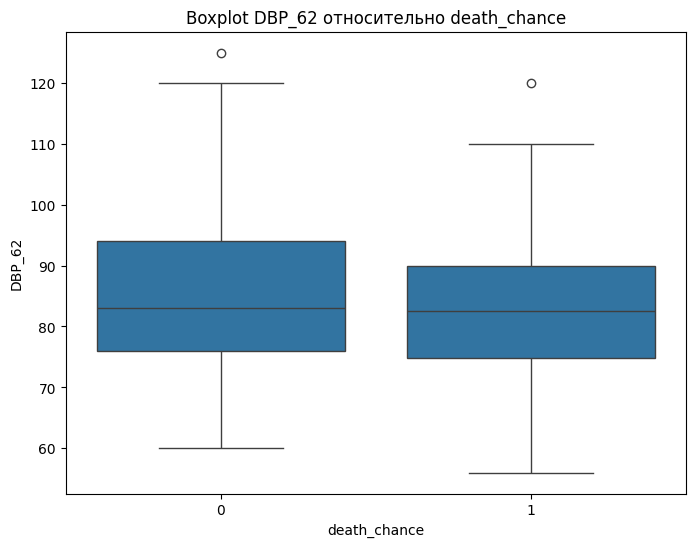

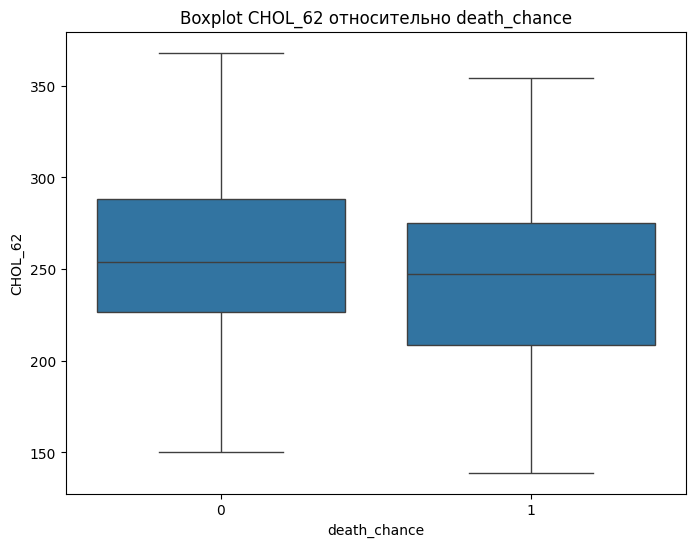

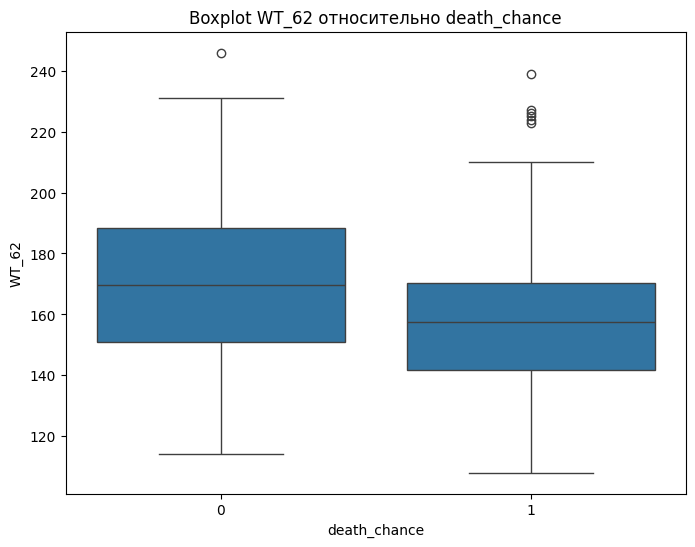

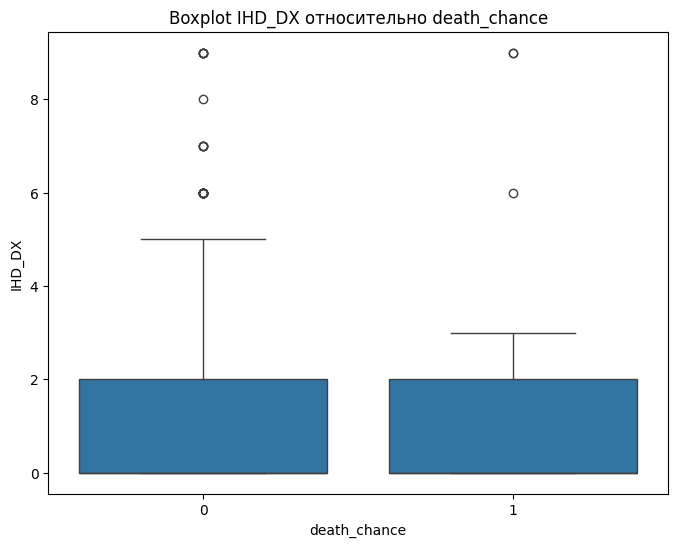

In [ ]:
# Построение boxplot для каждой переменной
for col in numeric_cols:
    plt.figure(figsize=(8, 6))
    sns.boxplot(x='death_chance', y=col, data=df)
    plt.title(f'Boxplot {col} относительно death_chance')
    plt.show()

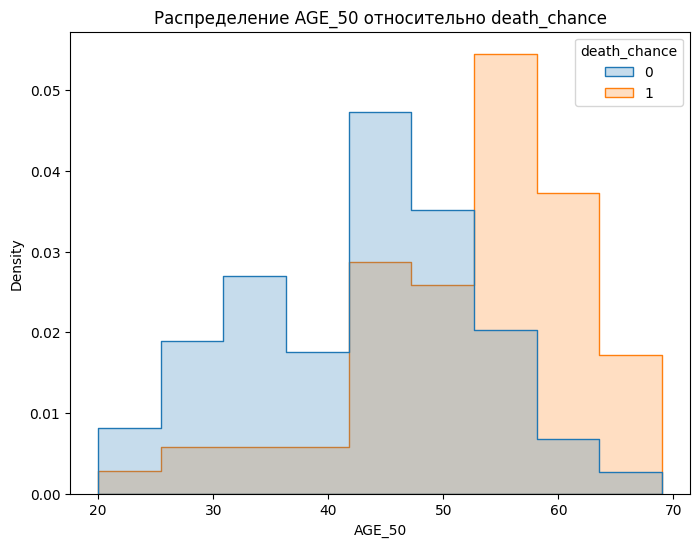

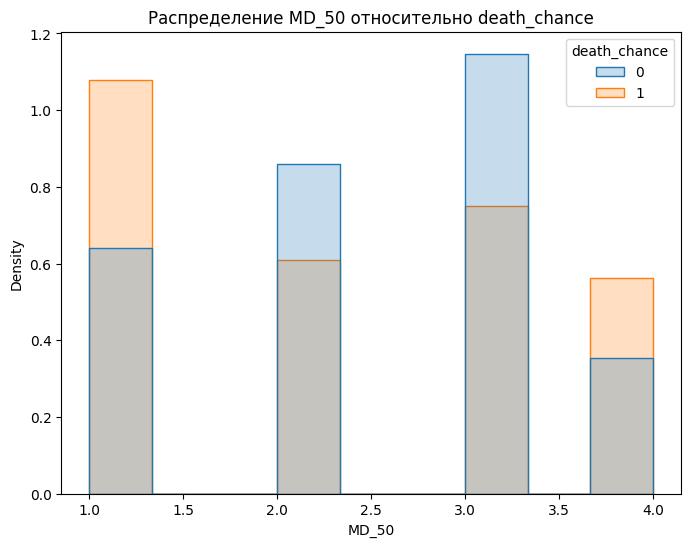

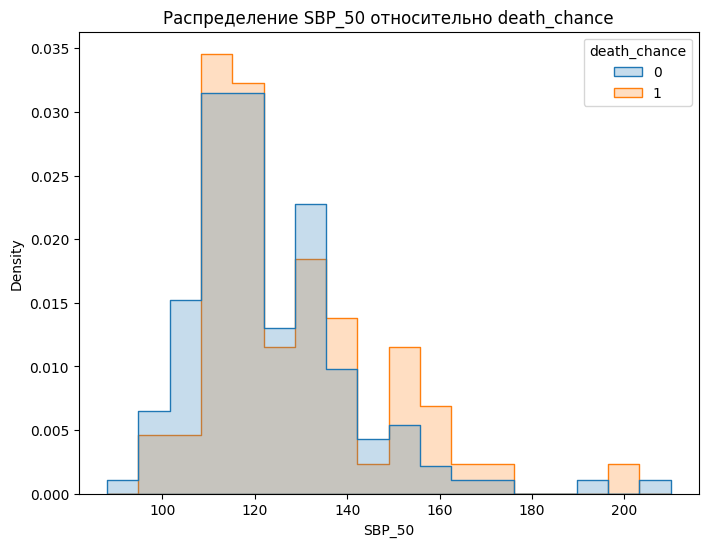

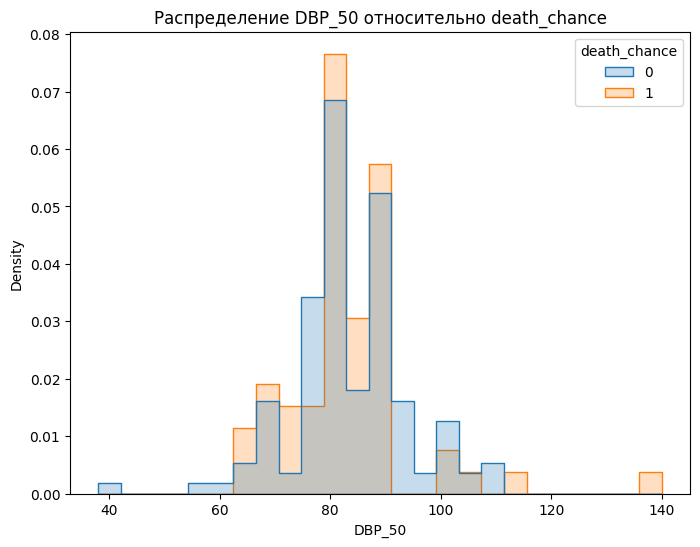

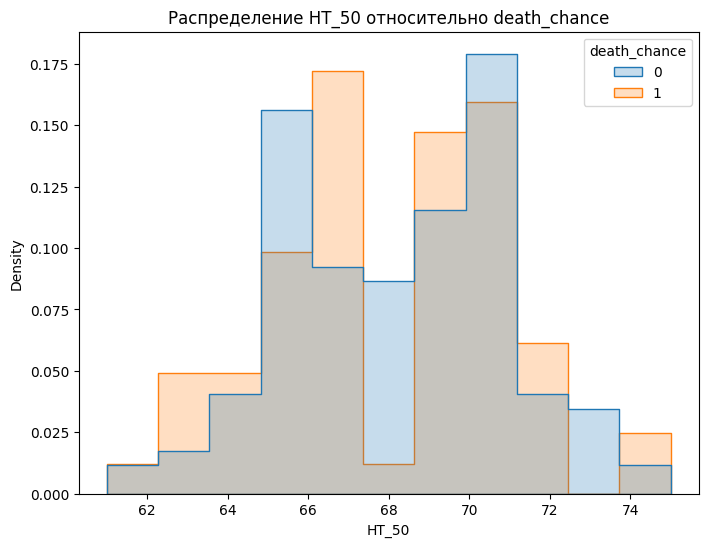

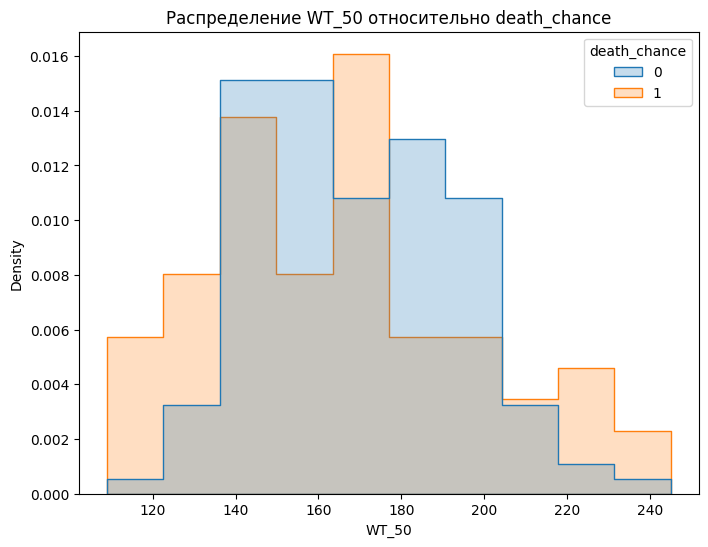

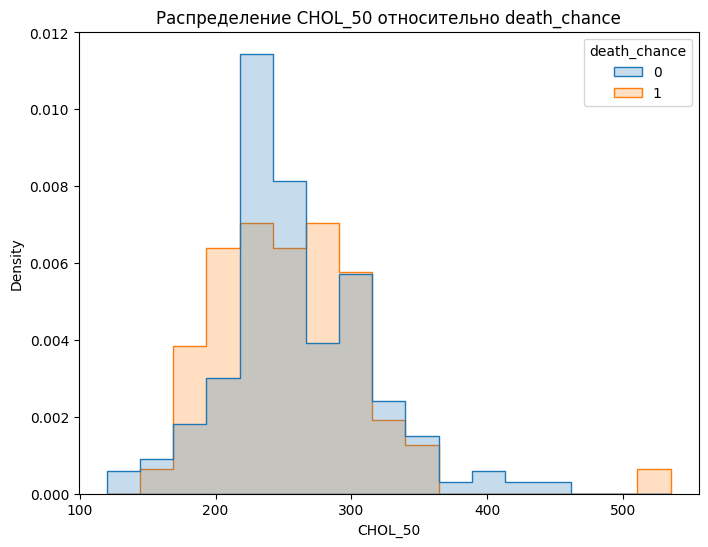

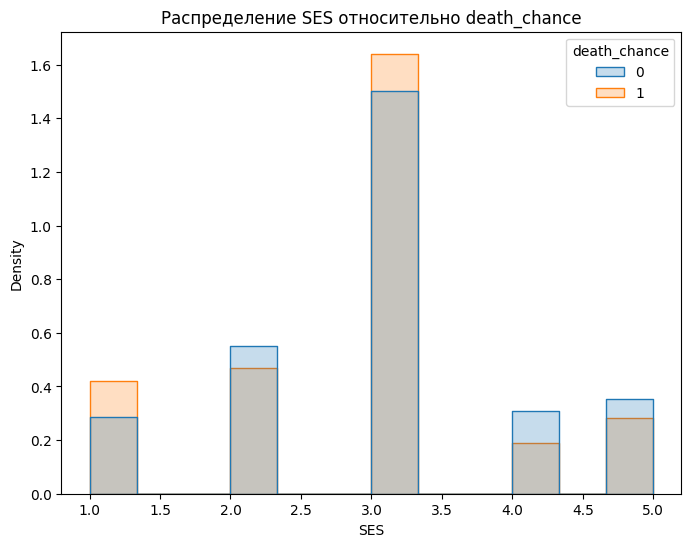

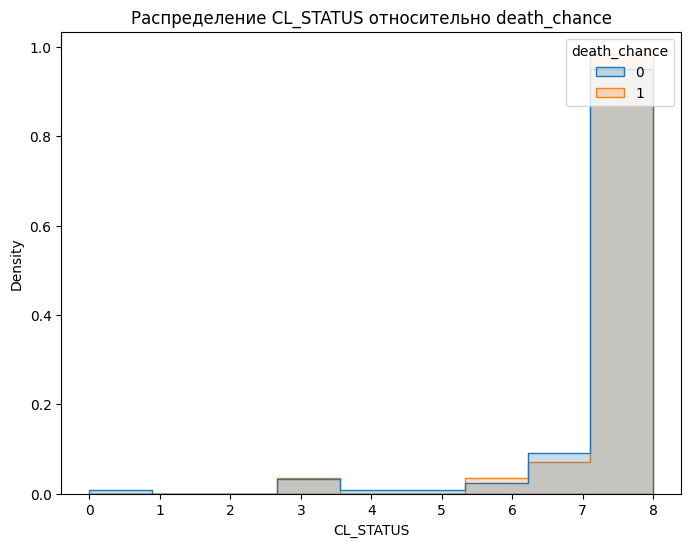

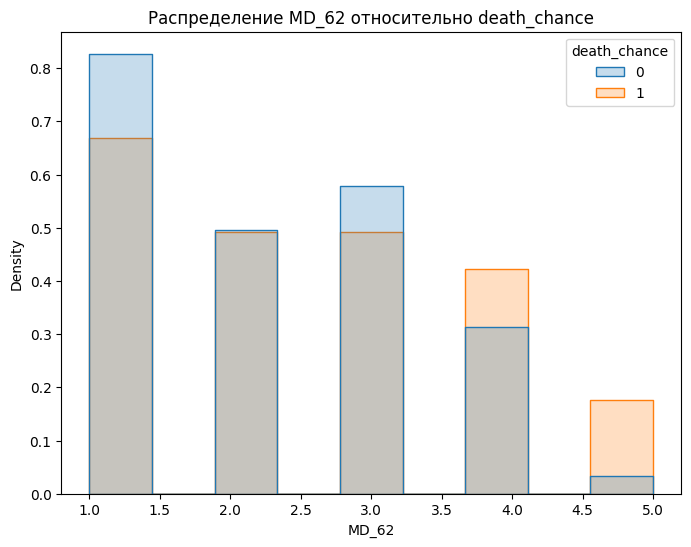

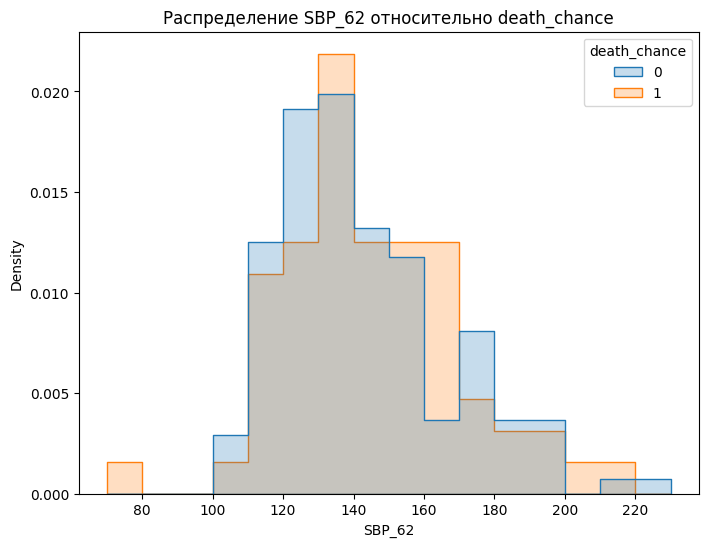

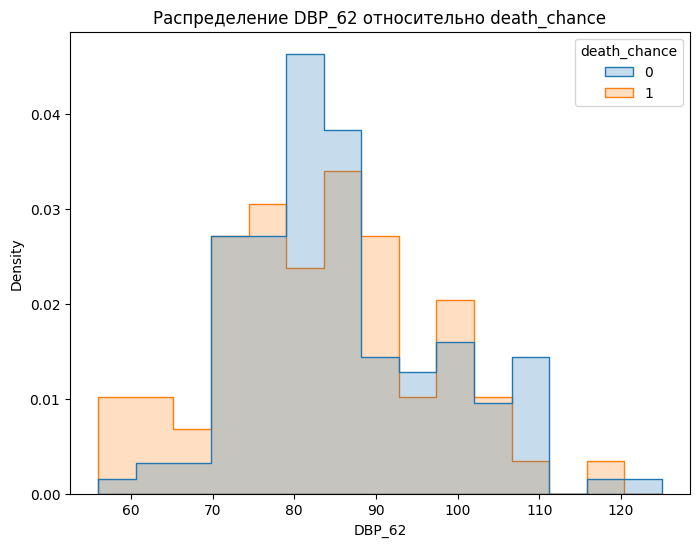

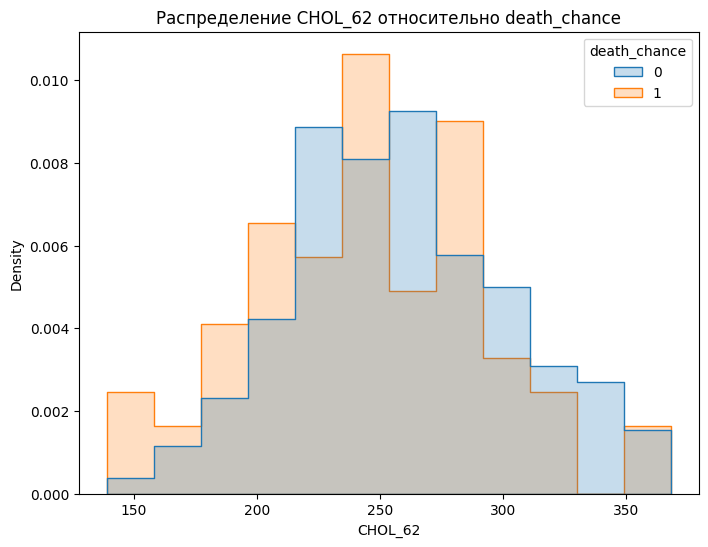

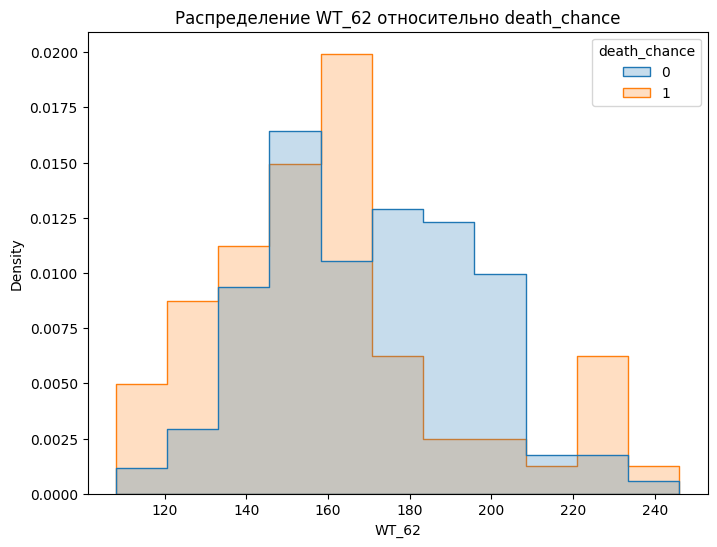

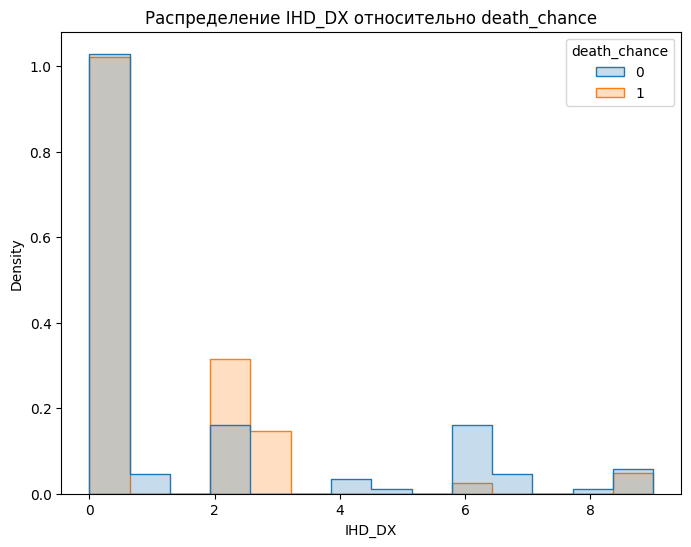

In [ ]:
# Построение диаграмм распределения для каждой переменной
for col in numeric_cols:
    plt.figure(figsize=(8, 6))
    sns.histplot(data=df, x=col, hue='death_chance', element="step", stat="density", common_norm=False)
    plt.title(f'Распределение {col} относительно death_chance')
    plt.show()

Проанализирован график, выделены значимые признаки относительно Y.

Рассматривая каждый отдельный график можно на многих заметить значительные выбросы или всплески, так на многих графиках Блоксплота можно заметить тенденцию к корреляции несмотря на выбросы и небольшое количество данных. При анализе также можно сопоставить их с диаграммой распределения и подкрепить свои преположения смотря на один и тот же показатель. На некотрых диаграммах прослеживаются четкие всплески смертности относительно того или иного показателя.


In [ ]:
# Описательная статистика для числовых переменных, разделенная по целевой переменной
desc_stats_numeric = df.groupby('death_chance')[df.select_dtypes(include=[np.number]).columns].describe()

# Описательная статистика для категориальных переменных, разделенная по целевой переменной
desc_stats_categorical = df.groupby('death_chance')[df.select_dtypes(include=['int64']).columns].describe()

### Описание полученных результатов
 ```Подобное описание для переменных:```

 Судя по диаграммам распределения и Боксплотам можно сделать следующие выводы:

Показатель AGE_50 - Пик смертей приходится на промежуток от 55 до 60 лет и сохраняет высокий показатель вплоть до 70 лет.

Также показатель MD кареллирует со сметностью. При показателе MD_50 на краях интервала заметны всплески: в диапозоне 1-1.3, а также в диапозоне от 3.7-4 наблюдается повышенная смертность пациентов. (среднее отклонение в зрении)

Показатель SBP также связан с показательлем смертности и мудя по распределению, пациенты с серцебиением в районе 150-160 статестически чаще умирали.

Пациенты с минимальной и масимальной массов тела (показатель WT_50) чаще других оказываеются не живыми. Если быть точным, то всплески наблюдаются на интервалах 54-60 кг и 108-120 кг.

In [ ]:
# Проходим по каждой числовой переменной и выводим статистику отдельно
for col in numeric_cols:
    print(f"Описательная статистика для {col}:\n")
    print(df.groupby('death_chance')[col].describe())
    print("\n" + "="*50 + "\n")


Описательная статистика для AGE_50:

              count     mean       std   min   25%   50%    75%   max
death_chance                                                         
0             136.0  43.1250  9.967679  20.0  35.0  45.0  50.00  64.0
1              64.0  52.3125  9.904104  25.0  47.0  53.0  59.25  69.0


Описательная статистика для MD_50:

              count      mean       std  min  25%  50%  75%  max
death_chance                                                    
0             136.0  2.404412  0.953579  1.0  2.0  2.5  3.0  4.0
1              64.0  2.265625  1.144236  1.0  1.0  2.0  3.0  4.0


Описательная статистика для SBP_50:

              count        mean        std    min    25%    50%    75%    max
death_chance                                                                 
0             136.0  123.257353  17.557523   88.0  110.0  120.0  130.0  210.0
1              64.0  127.765625  19.023580  100.0  115.0  120.0  140.0  200.0


Описательная статистика для DBP_

In [ ]:
print("\nКатегориальные переменные:")
desc_stats_categorical


Категориальные переменные:


AGE_50                                                    MD_50  \
              count     mean       std   min   25%   50%    75%   max  count   
death_chance                                                                   
0             136.0  43.1250  9.967679  20.0  35.0  45.0  50.00  64.0  136.0   
1              64.0  52.3125  9.904104  25.0  47.0  53.0  59.25  69.0   64.0   

                        ... DEATH      death_chance                           \
                  mean  ...   75%  max        count mean  std  min  25%  50%   
death_chance            ...                                                    
0             2.404412  ...   0.0  0.0        136.0  0.0  0.0  0.0  0.0  0.0   
1             2.265625  ...   1.0  1.0         64.0  1.0  0.0  1.0  1.0  1.0   

                        
              75%  max  
death_chance            
0             0.0  0.0  
1             1.0  1.0  

[2 rows x 136 columns]

#### 1. **Возраст (AGE_50)**:
   
- **Средние значения**: Средний возраст группы с низким риском смерти составляет 43.13 года, тогда как для группы с высоким риском – 52.31 года. Это указывает на то, что **более высокий риск смерти ассоциирован с старшим возрастом**.

#### 2. **Индекс коморбидности (MD_50)**:

- **Средние значения**: Уровень среднего отклонения зрения  для группы с низким риском смерти (2.40) немного выше по сравнению с группой с высоким риском (2.27). Это может показывать, что меньший уровень связанн с меньшим риском, но не значительно.
- **Разброс**: Стандартное отклонение (0.95 и 1.14) подчеркивает небольшие различия в вариативности между группами.

#### 3. ** Систолическое артериальное давление (SBP_50)**:

- **Средние значения**: Средний уровень систолического артериального давления для группы с низким риском составляет 123.26 мм рт. ст., в то время как для группы с высоким риском – 127.77 мм рт. ст. Это говорит о том, что карелляция минимальна.
- **Разброс близкий к минимальному**: Стандартное отклонение для вышеуказанных групп также показывают наличие незначительной вариативности: 17.56 и 19.02 соответственно.

#### 4. **  Диастолическое артериальное давление (DBP_50)**:

- **Средние значения**: Среднее диастолическое давление у группы с низким риском – 83.43 мм рт. ст., а в группе с высоким риском – 83.28 мм рт. ст. В этом случае различия минимальны.
- **Разброс минимум**: Оба значения показывают относительно стабильные показатели среди обеих групп, хотя стандартное отклонение (10.66 и 11.77) указывает на небольшие различия в вариативности.

#### 5. **Гематокрит (HT_50)**:
Гематокрит (HT_50):
Средний уровень геметокрита (HT) для группы с низким риском составляет 68.24, а для группы с высоким риском – 67.98. Показатели не имеют значительной разницы между группами, соответственно не имют какой-то зависимости.


#### 6. **Вес тела (WT_50)**:
  
Пациенты с низким риском имеют средний вес 169.24 ЛБ, в то время как группа с высоким риском – 165.59 ЛБ. Разница в весе не такая большая, это вряд ли
может указывать на связь влияния веса
на риска.
- **Разброс**: Стандартное отклонение (24.03 и 31.54) указывает на большую вариативность в весе среди пациентов с высоким риском.

#### 7. **Уровень холестерина (CHOL_50)**:
  
- **Средние значения**: Уровень холестерина в группе с низким риском составляет 259.27 мг/дл, что немного выше, чем в группе с высоким риском (255.63 мг/дл). Такая разница может указывать на связь между уровнем холестерина и общей состоянием здоровья.
- **Разброс**: Стандартное отклонение (54.41 и 58.19) говорит о значительной вариативности в уровне холестерина среди пациентов.

#### 8. **Социально-экономический статус (SES)**:

Социально-экономический статус (SES) для группы с низким риском составляет 2.96, в то время как для группы с высоким риском – 2.81. Несмотря на то, что разница незначительна, это может указывать на связь между социально-экономическими факторами и риском смерти.
Вариативность в показателе SES достаточно стабильна для обеих групп



#### 9. **Статус клинических исследований (CL_STATUS):**:

Средний статус клинических исследований у группы с низким риском составляет 7.62, а у группы с высоким риском – 7.72. Оба показателя довольно близки, и различия между группами минимальны.

#### 10. **Уровень коморбидности (MD62)**:
  Уровень коморбидности (MD62) в группе с низким риском составляет 2.21, а в группе с высоким риском – 2.53. Это предполагает, что **более высокая коморбидность** может ассоциироваться с увеличением риска.
Разброс: Стандартное отклонение (1.13 и 1.31) свидетельствует о наличии определенной вариативности в коморбидности среди групп.

#### 11. **Систолическое артериальное давление (SBP62):**:
  
- Средние значения: Среднее систолическое артериальное давление (SBP) для группы с низким риском смерти составляет 140.75 мм рт. ст., тогда как для группы с высоким риском – 143.03 мм рт. ст. Это свидетельствует о том, что у пациентов с высоким риском смерти немного **более высокие показатели систолического давления**
Стандартное отклонение (std) для обеих групп достаточно велико (приблизительно 24.27 для группы с риском 0 и 25.57 для группы с риском 1), что указывает на значительную вариативность в показателях давления

#### 12. **Диастолическое артериальное давление (DBP62)**:

Для группы с низким риском среднее диастолическое давление составляет 85.53 мм рт. ст., а для группы с высоким риском – 83.31 мм рт. ст. **Удивительно, что у группы с высоким риском диастолическое давление ниже.**
Стандартное отклонение невелико (примерно 12.63 и 13.14), что говорит о более стабильных значениях в обеих группах.

#### 13. **Уровень холестерина (CHOL62):**
Уровень холестерина в группе с низким риском смерти составляет 258.38 мг/дл, что выше, чем в группе с высоким риском – 244.92 мг/дл. Это может указывать на то, что **более низкий уровень холестерина ассоциирован с большим риском смерти, что тоже странно**

### 14. Вес тела (WT62):**
Средний вес для группы с низким риском составляет 170.54 ЛБ, а для группы с высоким риском – 160.64 ЛБ. Это может указывать на **обратную зависимость между весом и риском смерти**.
Стандартное отклонение (25.57 и 30.37) выше в группе с высоким риском, что может указывать на **большую непредсказуемость в распределении веса** среди этих пациентов.

## 15. Диагноз ишемической болезни сердца (IHDDX):**
- Средние значения: Среднее значение для группы с низким риском составляет 1.57, тогда как для группы с высоким риском – 1.06. Этот показатель не показывает значительного различия между группами и, возможно, не связан с карелляцией.
Средний уровень ишемической болезни в обеих группах находится в пределах одной и той же категории, и различия в стандартном отклонении (2.67 и 1.92) также не существенны.

### Вывод:
На основе представленных данных можно сделать выводы о ключевых характеристиках, которые влияют на шанс смерти. В частности:
- Больший риск смерти имеют люди с: **более высокие показатели систолического давления**, более высокое сердечное давление.
- Также на большую вероятность смерти укаювает **более высокая коморбидность** и **более старый возраст**, со средним значением 52 года.
- Несмотря на различия, такие параметры, как уровень холестерина, почечное давление, ийшемическая болезнь сердца и другие, имеют незначительное влияние на смертность, или же выборка было слишком мала для того, чтобы вывести точные закономерности.

## 2. Расчет теста Пирсона

### **Описание:**
Вы рассчитаете коэффициенты корреляции Пирсона между Y и каждым из признаков X, чтобы оценить значимость этих корреляций.

### **Шаги:**

1. **Рассчитайте коэффициенты корреляции Пирсона для каждого признака:**

In [ ]:
df[df.select_dtypes(include=[np.number]).columns].corr()

,AGE_50,MD_50,SBP_50,DBP_50,HT_50,WT_50,CHOL_50,SES,CL_STATUS,MD_62,SBP_62,DBP_62,CHOL_62,WT_62,IHD_DX,DEATH,death_chance
AGE_50,1.000000,0.022067,0.311815,0.149431,-0.140032,-0.028314,0.069988,-0.141201,-0.034221,0.102846,0.291354,-0.074081,-0.149335,-0.184383,-0.028540,0.397356,0.397356
MD_50,0.022067,1.000000,-0.001199,0.038443,-0.050876,-0.061801,-0.075200,0.042115,0.000882,-0.019306,-0.092437,-0.007341,0.052976,-0.029073,-0.085207,-0.063779,-0.063779
SBP_50,0.311815,-0.001199,1.000000,0.747623,-0.162285,0.101327,0.013411,-0.020001,-0.517543,-0.051933,0.485679,0.316481,-0.182626,-0.013504,0.049263,0.116385,0.116385
DBP_50,0.149431,0.038443,0.747623,1.000000,-0.034516,0.258936,0.049413,-0.011338,-0.427714,-0.062561,0.420695,0.416171,-0.105450,0.145620,0.071156,-0.006174,-0.006174
HT_50,-0.140032,-0.050876,-0.162285,-0.034516,1.000000,0.440524,-0.095610,-0.054799,0.164069,0.015044,-0.038900,0.071399,-0.043998,0.513601,0.019802,-0.043632,-0.043632
WT_50,-0.028314,-0.061801,0.101327,0.258936,0.440524,1.000000,0.053567,0.021217,0.003748,-0.077172,0.080052,0.170940,-0.048215,0.816533,0.117110,-0.064055,-0.064055
CHOL_50,0.069988,-0.075200,0.013411,0.049413,-0.095610,0.053567,1.000000,-0.126293,0.072288,-0.053953,0.003942,-0.035155,0.462148,-0.027414,0.178950,-0.030717,-0.030717
SES,-0.141201,0.042115,-0.020001,-0.011338,-0.054799,0.021217,-0.126293,1.000000,-0.092120,-0.112451,-0.090498,-0.001490,-0.034637,0.070597,-0.074431,-0.065920,-0.065920
CL_STATUS,-0.034221,0.000882,-0.517543,-0.427714,0.164069,0.003748,0.072288,-0.092120,1.000000,0.105162,-0.212845,-0.143170,0.150423,0.044730,-0.002368,0.042225,0.042225
MD_62,0.102846,-0.019306,-0.051933,-0.062561,0.015044,-0.077172,-0.053953,-0.112451,0.105162,1.000000,0.019538,0.005683,-0.046520,-0.013978,-0.061039,0.124237,0.124237


2. ⏰ **Интерпретируйте результаты:**

Почти все догадки на начаьлном этапе рассматрения графиков оказались верны

### Интерпретация:
- **Коэффициент корреляции Пирсона** показывает степень линейной связи между двумя переменными.

1. **Возраст (AGE50)**: Имеет положительную корреляцию с вероятностью смерти (0.397). Это указывает на то, что с увеличением возраста риск смерти также возрастает.

2. **Среднее давление** (SBP50 и DBP50):
   - Систолическое артериальное давление (SBP50) показывает умеренный положительный коэффициент корреляции с вероятностью смерти (0.116), что может свидетельствовать о его значимости как фактора риска.
   - Диастолическое артериальное давление (DBP50) имеет близкий к нулю коэффициент (-0.006174), что указывает на отсутствие сильной связи с вероятностью смерти.

3. **Масса тела (WT50)**: Слабая связь с вероятностью смерти (-0.064055), что говорит о том, что вес сам по себе не является значительным предиктором риска в данной выборке.

4. **Холестерин (CHOL50)**: Показатель холестерина имеет незначительный отрицательный коэффициент (-0.030717), что также указывает на его низкую связанность с риском смерти.

5. **Социально-экономический статус (SES)**: Не имеет явной связи с вероятностью смерти (-0.065920), соответственно, влияние этого фактора также ограничено в данной выборке.

6. **Клинический статус (CLSTATUS)**: Легкая положительная корреляция (0.042225) может свидетельствовать о незначительном влиянии этого показателя на риск.

7. **Показатели с приставкой ##_62**: Показатели, такие как MD62, SBP62 и DBP62, показывают положительную корреляцию с вероятностью смерти, как те же показатели с приставкой **_50**, предположим, что это те же измерения, только в другой промежуток времени.

8. **Ишемическая болезнь (IHDDX)**: Показатель практически не коррелирует с вероятностью смерти (-0.096981), что может указывать на то, что наличие диагноза не является основным фактором риска в данном анализе.

### Описание корреляций для значимых признаков:



1. **Alcohol и Quality (0.444)**:
   - Есть умеренная положительная корреляция между содержанием алкоголя и качеством вина. Это указывает на то, что вина с более высоким содержанием алкоголя чаще оцениваются выше. Этот признак может быть значимым для прогнозирования качества вина, поскольку он имеет достаточно сильную связь с целевой переменной.

2. **Alcohol и is_best_wine (0.390)**:
   - Похожая корреляция наблюдается между содержанием алкоголя и принадлежностью вина к категории лучших (is_best_wine). Более высокое содержание алкоголя коррелирует с вероятностью, что вино будет оценено как "лучшее".

3. **Quality и is_best_wine (0.759)**:
   - Как и ожидалось, очень высокая корреляция между качеством вина и принадлежностью к категории лучших вин. Это обусловлено тем, что признак `is_best_wine` напрямую основан на значении `quality`.

4. **Total Sulfur Dioxide и Free Sulfur Dioxide (0.720)**:
   - Высокая корреляция между общим и свободным диоксидом серы. Это вполне ожидаемо, так как общий диоксид серы включает в себя свободную и связанную формы. В этом случае один из признаков может быть исключен для предотвращения избыточности информации в модели.

5. **Residual Sugar и Density (0.553)**:
   - Средняя положительная корреляция между остаточным сахаром и плотностью вина. Более высокое содержание остаточного сахара увеличивает плотность вина, что логично, так как сахар увеличивает массу раствора. Этот признак также может вызвать мультиколлинеарность.

6. **Density и Alcohol (-0.687)**:
   - Сильная отрицательная корреляция между плотностью и содержанием алкоголя. Вина с высоким содержанием алкоголя имеют меньшую плотность, что объясняется физическими свойствами спирта. Это важно учитывать при построении моделей, чтобы избежать мультиколлинеарности.

7. **Alcohol и Density (-0.686)**:
   - Как уже упоминалось, это значительная отрицательная корреляция. В этом случае, возможно, стоит исключить один из этих признаков для предотвращения мультиколлинеарности.

### Почему мультиколлинеарность это плохо?

Мультиколлинеарность возникает, когда два или более независимых признака сильно коррелируют друг с другом. Это приводит к нескольким проблемам:

1. **Переоценка значимости признаков**:
   - Когда признаки сильно коррелированы, модель может "перепутать" влияние каждого из них на целевую переменную, что приведет к ненадежным коэффициентам. Это затрудняет интерпретацию модели, поскольку сложно понять, какой из признаков действительно важен.

2. **Нестабильность модели**:
   - При наличии мультиколлинеарности небольшие изменения в данных могут привести к большим изменениям в коэффициентах модели. Это делает модель нестабильной и менее устойчивой.

3. **Затруднение выбора значимых признаков**:
   - Модель может затрудняться при выделении важности отдельных признаков, если они сильно связаны друг с другом. Это может усложнить процесс отбора признаков и снизить точность модели.

4. **Увеличение дисперсии коэффициентов**:
   - Мультиколлинеарность увеличивает дисперсию оценок коэффициентов регрессии, что делает их менее надежными. В результате, некоторые признаки могут казаться незначимыми, хотя на самом деле они играют важную роль.

## 3. Немного машинного обучения

- отберем признаки (числовые и категориальные отдельно)
- обработаем числовые и категориальыне
- обучим модель
- узнаем что влияет на Y

In [ ]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler, OneHotEncoder
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, classification_report

In [ ]:
excluded_features = ['MD_50', 'SES', 'CL_STATUS', 'MD_62', 'DEATH']

# Выбираем категориальные признаки
categorical_features = [col for col in X.select_dtypes(include=['int64']).columns.tolist() if col in included_features]

print("Категориальные признаки:", categorical_features)


Категориальные признаки: ['MD_50', 'SES', 'CL_STATUS', 'MD_62']


In [ ]:
included_features = ['MD_50', 'SES', 'CL_STATUS', 'MD_62', 'DEATH']

# Выбираем числовые признаки
numeric_features = [col for col in X.select_dtypes(include=['int64']).columns.tolist() if col not in excluded_features]

print("Числовые признаки:", numeric_features)

Числовые признаки: ['AGE_50', 'SBP_50', 'DBP_50', 'HT_50', 'WT_50', 'CHOL_50', 'SBP_62', 'DBP_62', 'CHOL_62', 'WT_62', 'IHD_DX']


In [ ]:
# Создаем копию данных
X_processed = X.copy()

# Применяем One-Hot Encoding
X_processed = pd.get_dummies(X_processed, columns=categorical_features, drop_first=True) # drop_first=True позволяет избежать мультиколлинеарности, удаляя первый уровень категориальной переменной.


In [ ]:
X_processed

,AGE_50,SBP_50,DBP_50,HT_50,WT_50,CHOL_50,SBP_62,DBP_62,CHOL_62,WT_62,...,CL_STATUS_3,CL_STATUS_4,CL_STATUS_5,CL_STATUS_6,CL_STATUS_7,CL_STATUS_8,MD_62_2,MD_62_3,MD_62_4,MD_62_5
0,42,110,65,64,147,291,120,78,271,146,...,False,False,False,False,False,True,False,False,True,False
1,53,130,72,69,167,278,122,68,250,165,...,False,False,False,True,False,False,True,False,False,False
2,53,120,90,70,222,342,132,90,304,223,...,False,False,False,False,False,True,False,False,False,False
3,48,120,80,72,229,239,118,68,209,227,...,False,False,False,False,False,True,True,False,False,False
4,53,118,74,66,134,243,118,56,261,138,...,False,False,False,False,False,True,False,False,False,True
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
195,50,115,80,66,148,300,115,65,273,152,...,False,False,False,False,False,True,False,False,False,False
196,23,110,70,69,137,120,112,76,198,153,...,False,False,False,False,False,True,True,False,False,False
197,20,130,80,66,150,210,130,85,274,158,...,False,False,False,False,False,False,False,False,False,False
198,46,140,84,66,138,130,148,88,160,157,...,False,False,False,True,False,False,True,False,False,False


In [ ]:
# Инициализируем scaler
scaler = MinMaxScaler()

# Применяем нормализацию
X_processed[numeric_features] = scaler.fit_transform(X_processed[numeric_features])


In [ ]:
X_processed

,AGE_50,SBP_50,DBP_50,HT_50,WT_50,CHOL_50,SBP_62,DBP_62,CHOL_62,WT_62,...,CL_STATUS_3,CL_STATUS_4,CL_STATUS_5,CL_STATUS_6,CL_STATUS_7,CL_STATUS_8,MD_62_2,MD_62_3,MD_62_4,MD_62_5
0,0.448980,0.180328,0.264706,0.214286,0.279412,0.412048,0.31250,0.318841,0.576419,0.275362,...,False,False,False,False,False,True,False,False,True,False
1,0.673469,0.344262,0.333333,0.571429,0.426471,0.380723,0.32500,0.173913,0.484716,0.413043,...,False,False,False,True,False,False,True,False,False,False
2,0.673469,0.262295,0.509804,0.642857,0.830882,0.534940,0.38750,0.492754,0.720524,0.833333,...,False,False,False,False,False,True,False,False,False,False
3,0.571429,0.262295,0.411765,0.785714,0.882353,0.286747,0.30000,0.173913,0.305677,0.862319,...,False,False,False,False,False,True,True,False,False,False
4,0.673469,0.245902,0.352941,0.357143,0.183824,0.296386,0.30000,0.000000,0.532751,0.217391,...,False,False,False,False,False,True,False,False,False,True
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
195,0.612245,0.221311,0.411765,0.357143,0.286765,0.433735,0.28125,0.130435,0.585153,0.318841,...,False,False,False,False,False,True,False,False,False,False
196,0.061224,0.180328,0.313725,0.571429,0.205882,0.000000,0.26250,0.289855,0.257642,0.326087,...,False,False,False,False,False,True,True,False,False,False
197,0.000000,0.344262,0.411765,0.357143,0.301471,0.216867,0.37500,0.420290,0.589520,0.362319,...,False,False,False,False,False,False,False,False,False,False
198,0.530612,0.426230,0.450980,0.357143,0.213235,0.024096,0.48750,0.463768,0.091703,0.355072,...,False,False,False,True,False,False,True,False,False,False


### Шаг 3: Объяснение логистической регрессии


Логистическая регрессия — это статистический метод для анализа набора данных, в котором одна или более независимых переменных определяют исход (зависимую переменную), которая является бинарной (т.е. принимает только два возможных значения, например, 0 и 1). Целью логистической регрессии является нахождение наилучшей модели, описывающей связь между независимыми переменными и вероятностью определенного исхода.

Основные характеристики:

Функция логита (логистическая функция): Используется для моделирования вероятности принадлежности наблюдения к определенному классу.
Выводы о влиянии признаков: Коэффициенты модели показывают, как изменение признака влияет на логарифм отношения шансов.

**Функция для обучения и оценки модели**

In [ ]:
def train_and_evaluate(X, Y):
    # Разделение данных на обучающую и тестовую выборки
    X_train, X_test, Y_train, Y_test = train_test_split(
        X, Y, test_size=0.2, random_state=42, stratify=Y)

    # Инициализация модели
    model = LogisticRegression(max_iter=1000)

    # Обучение модели
    model.fit(X_train, Y_train)

    # Предсказания на обучающей выборке
    Y_train_pred = model.predict(X_train)
    train_accuracy = accuracy_score(Y_train, Y_train_pred)

    # Предсказания на тестовой выборке
    Y_test_pred = model.predict(X_test)
    test_accuracy = accuracy_score(Y_test, Y_test_pred)

    # Вывод результатов
    print(f"Точность на обучающей выборке: {train_accuracy:.4f}")
    print(f"Точность на тестовой выборке: {test_accuracy:.4f}")

    # Классификационный отчет
    print("\nКлассификационный отчет на тестовой выборке:")
    print(classification_report(Y_test, Y_test_pred))

    return model


In [ ]:
class_distribution = pd.Series(Y).value_counts()
print(class_distribution)

death_chance
0    136
1     64
Name: count, dtype: int64


In [ ]:
# Обучение модели
model = train_and_evaluate(X_processed, Y)

Точность на обучающей выборке: 0.7688
Точность на тестовой выборке: 0.7250

Классификационный отчет на тестовой выборке:
              precision    recall  f1-score   support

           0       0.72      0.96      0.83        27
           1       0.75      0.23      0.35        13

    accuracy                           0.72        40
   macro avg       0.74      0.60      0.59        40
weighted avg       0.73      0.72      0.67        40



**Пояснение:**

- Точность (Accuracy): Доля правильных предсказаний от общего числа предсказаний.
- Precision (Точность): Доля правильных положительных предсказаний среди всех положительных предсказаний.
- Recall (Полнота): Доля правильно предсказанных положительных случаев среди всех реальных положительных случаев.
- F1-score: Гармоническое среднее между точностью и полнотой.

In [ ]:
# Получение коэффициентов модели
coefficients = pd.DataFrame({
    'Feature': X_processed.columns,
    'Coefficient': model.coef_[0]
})

# Сортировка по абсолютному значению коэффициента
coefficients['Abs_Coefficient'] = coefficients['Coefficient'].abs()
coefficients = coefficients.sort_values(by='Abs_Coefficient', ascending=False)

print(coefficients[['Feature', 'Coefficient']])


        Feature  Coefficient
0        AGE_50     2.217479
9         WT_62    -1.196576
8       CHOL_62    -0.932828
27      MD_62_5     0.781322
12      MD_50_3    -0.747923
23  CL_STATUS_8     0.639572
11      MD_50_2    -0.624930
14        SES_2    -0.602498
1        SBP_50     0.513746
16        SES_4    -0.359326
10       IHD_DX    -0.342452
19  CL_STATUS_4    -0.317748
26      MD_62_4     0.282244
17        SES_5    -0.249892
3         HT_50     0.225856
5       CHOL_50    -0.162306
24      MD_62_2     0.151742
2        DBP_50    -0.151702
15        SES_3    -0.148459
7        DBP_62     0.141680
4         WT_50    -0.126547
22  CL_STATUS_7    -0.122167
21  CL_STATUS_6    -0.095032
20  CL_STATUS_5    -0.077922
6        SBP_62    -0.052997
25      MD_62_3     0.035449
13      MD_50_4    -0.032603
18  CL_STATUS_3     0.016721


**Пояснение:**

- Коэффициенты показывают влияние признака на вероятность принадлежности к классу 1 (лучшие вина).
- Положительный коэффициент: Увеличение признака повышает вероятность принадлежности к классу 1.
- Отрицательный коэффициент: Увеличение признака снижает вероятность принадлежности к классу 1.

## 4. Построение модели логистической регрессии для предсказания качества вина

- **Модель логистической регрессии успешно обучена для предсказания лучших вин.**
- **Точность на обучающей и тестовой выборках высока, что указывает на хорошую способность модели обобщать данные.**
- **Анализ коэффициентов показал, какие признаки наиболее влияют на качество вина:**
  - **Содержание алкоголя и сульфатов положительно влияют на качество.**
  - **Плотность и летучая кислотность отрицательно влияют на качество.**
- **Преобразование категориальных признаков и нормализация числовых признаков улучшили качество модели и упростили интерпретацию результатов.**


### 4.1 Кросс-валидация модели

In [ ]:
from sklearn.model_selection import cross_val_score

# Кросс-валидация с 5 фолдами
scores = cross_val_score(model, X_processed, Y, cv=5, scoring='accuracy')

print(f"Средняя точность при кросс-валидации: {scores.mean():.4f}")
print(f"Отклонение точности: {scores.std():.4f}")

Средняя точность при кросс-валидации: 0.7200
Отклонение точности: 0.0857


In [ ]:
X_train, X_test, Y_train, Y_test = train_test_split(X_processed, Y, test_size=0.2, random_state=42, stratify=Y)

### 4.2 Построение ROC-кривой

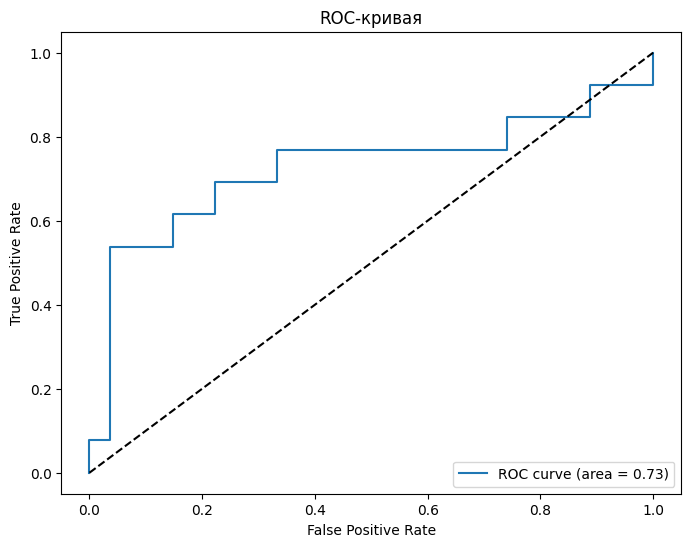

In [ ]:
from sklearn.metrics import roc_curve, auc

# Предсказания вероятностей для тестовой выборки
Y_test_prob = model.predict_proba(X_test)[:, 1]

# Расчет ROC-кривой
fpr, tpr, thresholds = roc_curve(Y_test, Y_test_prob)
roc_auc = auc(fpr, tpr)

# Построение графика
plt.figure(figsize=(8,6))
plt.plot(fpr, tpr, label=f'ROC curve (area = {roc_auc:.2f})')
plt.plot([0,1], [0,1], 'k--')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC-кривая')
plt.legend(loc='lower right')
plt.show()

## ⏰ Доп задание

Изучить различные метрики качества классификационных моделей и понять, в каких ситуациях они наиболее информативны.

**Метрики для исследования:**
- Accuracy (Точность)
- Precision (Точность)
- Recall (Полнота)
- F1 Score
- ROC-AUC
- Log Loss

**Попробовать другие модели и сравнить результат метрик**

**Попробовать другие методы отбора признаков**

**Использовать параметры модели и исследовать влияние на предсказание**

## Заключение

Мы успешно построили модель логистической регрессии для предсказания лучших вин на основе химических характеристик. Преобразование данных и анализ коэффициентов модели позволили нам понять влияние различных признаков на качество вина.


---

# Примечания

- **Логистическая регрессия** является мощным инструментом для бинарной классификации и позволяет интерпретировать результаты через коэффициенты модели.
- **Преобразование категориальных признаков** (One-Hot Encoding) и **нормализация числовых признаков** являются стандартными шагами предобработки данных для многих алгоритмов машинного обучения.
- **Анализ коэффициентов модели** помогает понять, какие признаки наиболее значимы и как они влияют на предсказания.

---

# Дополнительная литература

- **Логистическая регрессия:**
  - [Документация scikit-learn](https://scikit-learn.org/stable/modules/generated/sklearn.linear_model.LogisticRegression.html)
- **Предобработка данных:**
  - [One-Hot Encoding](https://scikit-learn.org/stable/modules/generated/sklearn.preprocessing.OneHotEncoder.html)
  - [Min-Max Scaling](https://scikit-learn.org/stable/modules/generated/sklearn.preprocessing.MinMaxScaler.html)
- **Метрики качества модели:**
  - [Classification Report](https://scikit-learn.org/stable/modules/generated/sklearn.metrics.classification_report.html)
  - [ROC-кривая и AUC](https://scikit-learn.org/stable/modules/generated/sklearn.metrics.roc_curve.html)

---